<a href="https://colab.research.google.com/github/guigomesa/imersao-dados-2-2020/blob/master/mardonio_franca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Influência do Transporte Público no Enem
<ul>
   <li> Nos dias de Enem : Transporte Público Gratuito para os Estudantes ! </li>
</ul>

 # Hipótese :
<ul>
  <li> Os Alunos que não tem transporte privado em suas casas, no segundo dia de Enem, se por acaso não obtiverem um bom desempenho no primeiro dia de prova, tem uma alta probabilidade de faltar no segundo dia</li>
</ul>

 # Campanha Estudantil :
<ul>
   <li>Façam todas as provas do Enem : Não desista das provas : teremos ônibus gratuito nos dias de Enem</li>
</ul>

# Base de Dados Selecionados :
<hr /> Foi selecionado a seguinte cidade para as análises:
<ul>
   <li> Fortaleza - Ceará </li>
  
</ul>

<strong> 1. Análise Inicial </strong>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [ ]:
source = "https://github.com/mardoniofranca/EnemPauBrasil/blob/main/data/DADOS_ENEM_2019_SAMPLE_Fortaleza.csv?raw=true"
df = pd.read_csv(source,dtype=str)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001015395,2019,2304400,Fortaleza,23,CE,20,M,1,3,1,2304400,Fortaleza,23,CE,2,0,2,1,0,23070897,2304400,Fortaleza,23,CE,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,BBACCABCABACDCAAEBEEDEDDCBECDCDCCACBBCBDCACBD,CDBDB99999BBCDDCBEEBDEAEDAECAECDADCEEDECACCCDA...,CCADCCACBADEBDCCABCBBBDDACBDCDAABDEBBBEDEBCEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1,120,120,120,140,120,620,D,C,C,F,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A
1,190001027042,2019,1100205,Porto Velho,11,RO,20,F,1,3,1,1100205,Porto Velho,11,RO,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,B,2,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,B
2,190001029638,2019,1302603,Manaus,13,AM,22,F,1,3,1,1505304,Oriximin\xe1,15,PA,1,4,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,F,F,5,C,B,C,C,C,A,B,A,B,B,B,A,B,C,A,B,C,A,C,B
3,190001044225,2019,2304400,Fortaleza,23,CE,57,F,3,3,1,1302603,Manaus,13,AM,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,F,1,B,A,B,B,A,A,B,A,B,A,A,B,A,B,A,A,B,A,A,A
4,190001059914,2019,2304400,Fortaleza,23,CE,18,M,1,1,1,1501402,Bel\xe9m,15,PA,2,0,2,1,0,23068809,2304400,Fortaleza,23,CE,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,EAECABABBBCCBCDEABCCCACEEDBECEDBEABEACBEEAADB,BEDBD99999EEBAEADBECDACECBDEBBECCDCDEBAACDBADC...,ABCBBCBCADBDDCCACCCBBDEECCBCACCDA*ABDEBBABCEC,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1,120,180,120,120,140,680,E,E,F,B,10,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [ ]:
len(df)

95089

<strong> Informações referente à Transporte Privado dos Alunos </strong>
<ul> <li> Q010 - Na sua residência tem carro? </li>
     <li> A : Não</li>
     <li> B : Sim, um </li>
     <li> C : Sim, dois </li>
     <li> D : Sim, três </li>
     <li> E : Sim, quatro ou mais </li>           
</ul>
<ul> <li> Q011 - Na sua residência tem motocicleta? </li>
     <li> A : Não</li>
     <li> B : Sim, uma </li>
     <li> C : Sim, duas </li>
     <li> D : Sim, três </li>
     <li> E : Sim, quatro ou mais </li>           
</ul>

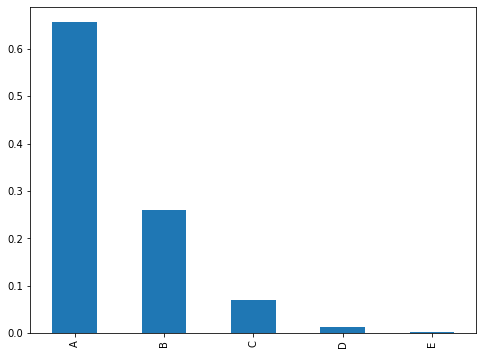

In [ ]:
df["Q010"].value_counts(normalize = True).plot.bar(figsize=(8,6))

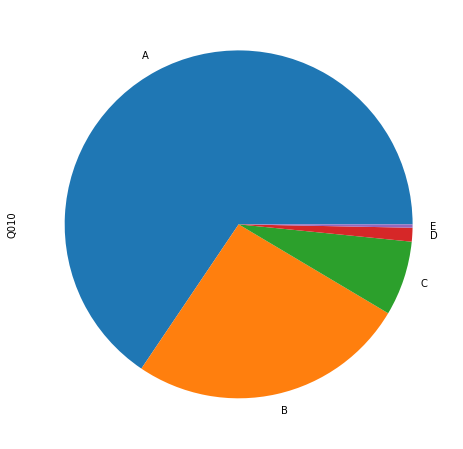

In [ ]:
df["Q010"].value_counts().plot.pie(figsize=(16,8))

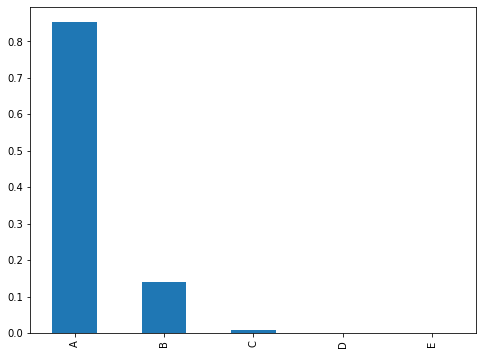

In [ ]:
df["Q011"].value_counts(normalize = True).plot.bar(figsize=(8,6))

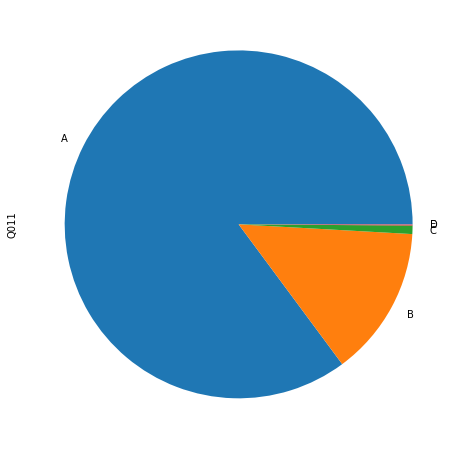

In [ ]:
df["Q011"].value_counts().plot.pie(figsize=(16,8))

<b> Consolidar Aluno com algum tipo de transporte seja carro ou motocicleta, a partir de 1 <b>

In [ ]:
def tem_transporte(opcaoVeiculo, opcaoMotocicleta):
    if (opcaoVeiculo == 'A') and (opcaoMotocicleta =='A'):
        return 0
    else:
        return 1

In [ ]:
df['TEM_TRANSPORTE'] = df.apply(lambda x: tem_transporte(x['Q010'], x['Q011']), axis=1)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TEM_TRANSPORTE
0,190001015395,2019,2304400,Fortaleza,23,CE,20,M,1,3,1,2304400,Fortaleza,23,CE,2,0,2,1,0,23070897,2304400,Fortaleza,23,CE,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,CDBDB99999BBCDDCBEEBDEAEDAECAECDADCEEDECACCCDA...,CCADCCACBADEBDCCABCBBBDDACBDCDAABDEBBBEDEBCEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1,120,120,120,140,120,620,D,C,C,F,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,0
1,190001027042,2019,1100205,Porto Velho,11,RO,20,F,1,3,1,1100205,Porto Velho,11,RO,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,B,2,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,B,1
2,190001029638,2019,1302603,Manaus,13,AM,22,F,1,3,1,1505304,Oriximin\xe1,15,PA,1,4,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,F,F,5,C,B,C,C,C,A,B,A,B,B,B,A,B,C,A,B,C,A,C,B,1
3,190001044225,2019,2304400,Fortaleza,23,CE,57,F,3,3,1,1302603,Manaus,13,AM,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,F,F,1,B,A,B,B,A,A,B,A,B,A,A,B,A,B,A,A,B,A,A,A,0
4,190001059914,2019,2304400,Fortaleza,23,CE,18,M,1,1,1,1501402,Bel\xe9m,15,PA,2,0,2,1,0,23068809,2304400,Fortaleza,23,CE,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,BEDBD99999EEBAEADBECDACECBDEBBECCDCDEBAACDBADC...,ABCBBCBCADBDDCCACCCBBDEECCBCACCDA*ABDEBBABCEC,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1,120,180,120,120,140,680,E,E,F,B,10,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0


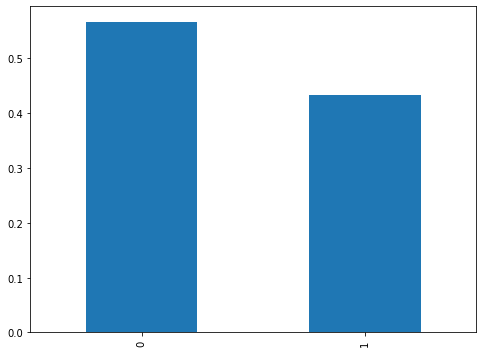

In [ ]:
df["TEM_TRANSPORTE"].value_counts(normalize = True).plot.bar(figsize=(8,6))

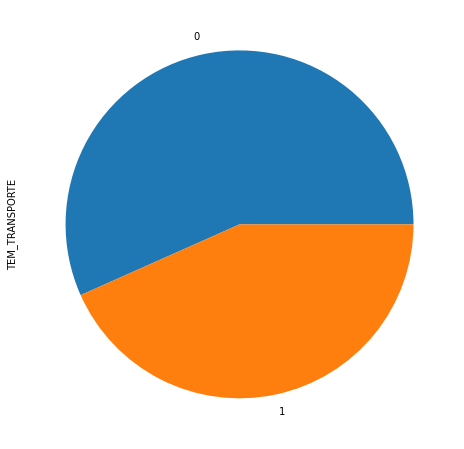

In [ ]:
df["TEM_TRANSPORTE"].value_counts().plot.pie(figsize=(16,8))

# Calendário Enem 2019 :
<hr /> O Enem acontece em duas datas como as seguines provas em cada dia:
<ul>
   <li> 1o. Dia – 03.11.19 (Provas : LC / Redação / CH). </li>
   <li> 2o. Dia - 10.11.19 (Provas : CN / Matemáticas).</li>
</ul>
<b>Fonte</b> : http://https://inep-enem.com.br/calendario-enem-2019-2020

In [ ]:
provas = ["NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_CH", "NU_NOTA_CN","NU_NOTA_MT"]

provas_1dia = ["NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_CH"]

provas_2dia = ["NU_NOTA_CN","NU_NOTA_MT"]

df["NU_NOTA_LC"]      = pd.to_numeric(df["NU_NOTA_LC"])
df["NU_NOTA_REDACAO"] = pd.to_numeric(df["NU_NOTA_REDACAO"])
df["NU_NOTA_CH"]      = pd.to_numeric(df["NU_NOTA_CH"])

df["NU_NOTA_CN"]      = pd.to_numeric(df["NU_NOTA_CN"])
df["NU_NOTA_MT"]      = pd.to_numeric(df["NU_NOTA_MT"])


df["NU_NOTA_TOTAL"]      = df[provas].sum(axis=1)
df["NU_NOTA_TOTAL_1DIA"] = df[provas_1dia].sum(axis=1)
df["NU_NOTA_TOTAL_2DIA"] = df[provas_2dia].sum(axis=1)

provas.append("NU_NOTA_TOTAL")

In [ ]:
df[provas].head()

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_TOTAL
0,467.0,620.0,453.2,403.5,402.9,2346.6
1,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,0.0
4,555.7,680.0,625.6,553.7,468.9,2883.9


In [ ]:
#Filtrar por notas não nulas
df = df.query("NU_NOTA_TOTAL != 0")
df[provas].sample(5).head()

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_TOTAL
45566,469.6,520.0,491.9,NaN,NaN,1481.5
6486,489.7,560.0,441.1,367.0,556.5,2414.3
86447,561.9,700.0,587.1,575.0,651.1,3075.1
45191,560.3,860.0,491.4,496.4,696.7,3104.8
21550,489.8,680.0,468.5,453.8,419.6,2511.7


In [ ]:
veiculo_ord = df["Q010"].unique()
veiculo_ord.sort()

Text(0.5, 1.0, 'BoxPlot notas de redacao influenciado pelo meio de transporte (carro) (próprio ou público)')

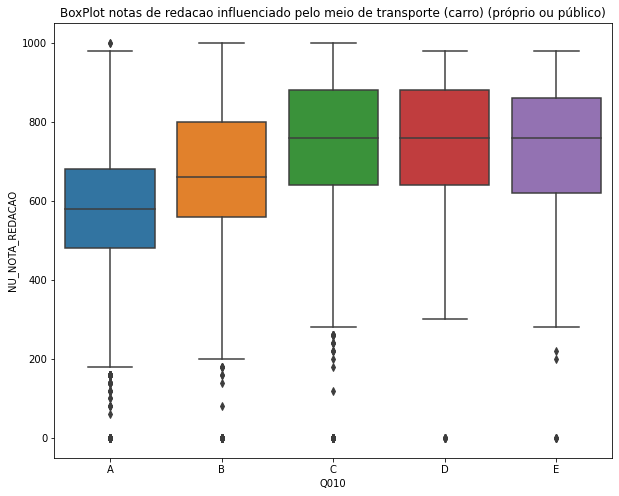

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "Q010", y = "NU_NOTA_REDACAO", data  = df, order = veiculo_ord )
plt.title("BoxPlot notas de redacao influenciado pelo meio de transporte (carro) (próprio ou público)")

Text(0.5, 1.0, 'BoxPlot notas de redacao influenciado pelo meio de transporte (motocicleta)  (próprio ou público)')

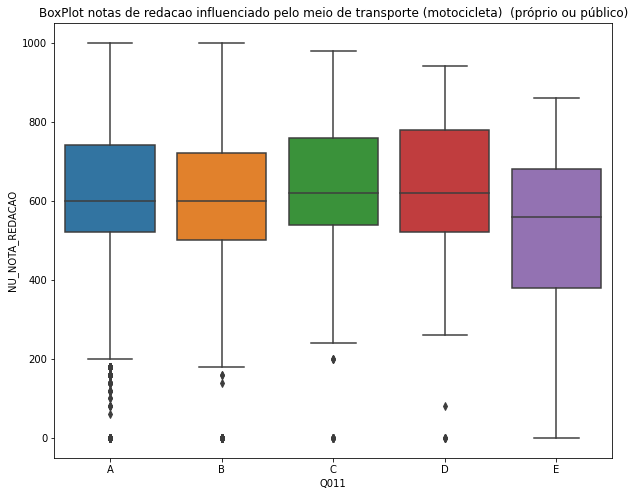

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "Q011", y = "NU_NOTA_REDACAO", data  = df, order = veiculo_ord )
plt.title("BoxPlot notas de redacao influenciado pelo meio de transporte (motocicleta)  (próprio ou público)")

Text(0.5, 1.0, 'BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)')

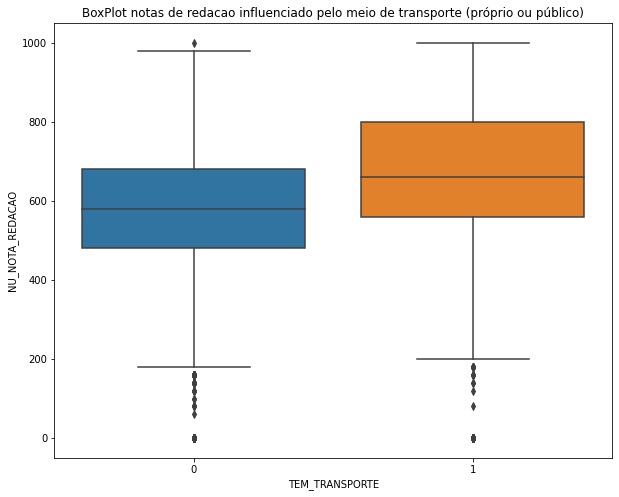

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "TEM_TRANSPORTE", y = "NU_NOTA_REDACAO", data  = df )
plt.title("BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)")

Text(0.5, 1.0, 'BoxPlot notas de total influenciado pelo meio de transporte (próprio ou público)')

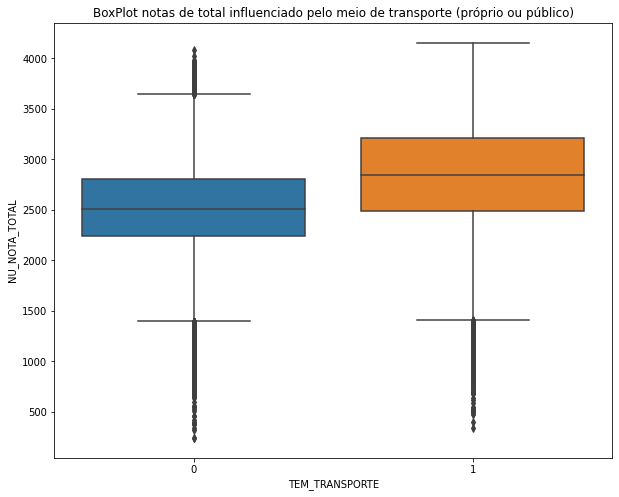

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "TEM_TRANSPORTE", y = "NU_NOTA_TOTAL", data  = df )
plt.title("BoxPlot notas de total influenciado pelo meio de transporte (próprio ou público)")

Text(0.5, 1.0, 'BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)')

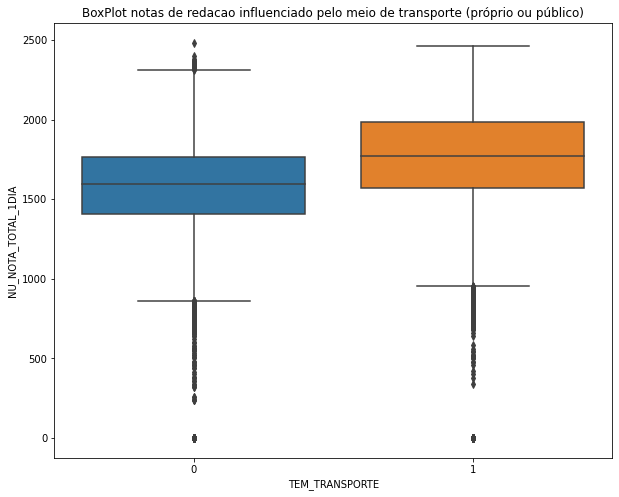

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "TEM_TRANSPORTE", y = "NU_NOTA_TOTAL_1DIA", data  = df )
plt.title("BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)")

Text(0.5, 1.0, 'BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)')

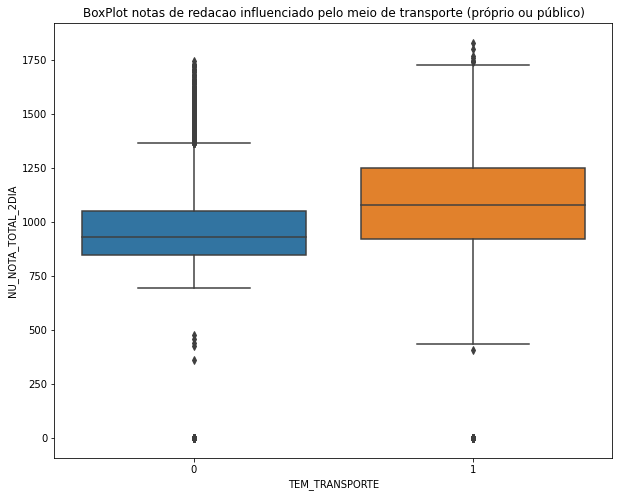

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "TEM_TRANSPORTE", y = "NU_NOTA_TOTAL_2DIA", data  = df )
plt.title("BoxPlot notas de redacao influenciado pelo meio de transporte (próprio ou público)")

<strong> Informações referente à Presença nas Provas </strong>
<ul> <li> TP_PRESENCA_LC - Presença na prova objetiva de Linguagens e Códigos </li>
     <li> 0 : Faltou à prova </li>
     <li> 1 : Presente na prova </li>
     <li> 2 : Eliminado na prova </li>
</ul>
<ul> <li> TP_PRESENCA_CH - Presença na prova objetiva de Ciências Humanas </li>
     <li> 0 : Faltou à prova </li>
     <li> 1 : Presente na prova </li>
     <li> 2 : Eliminado na prova </li>
</ul>
<ul> <li> TP_PRESENCA_MT - Presença na prova objetiva de Matemática </li>
     <li> 0 : Faltou à prova </li>
     <li> 1 : Presente na prova </li>
     <li> 2 : Eliminado na prova </li>
</ul>
<ul> <li> TP_PRESENCA_CN - Presença na prova objetiva de Ciências da Natureza </li>
     <li> 0 : Faltou à prova </li>
     <li> 1 : Presente na prova </li>
     <li> 2 : Eliminado na prova </li>
</ul>

<b> Consolidar Aluno que faltou no 2o. Dia <b>

In [ ]:
def fez_prova_2dia(presencaMT, presencaCN):
    if (presencaMT == '0') or (presencaCN =='0'):
        return 0
    else:
        return 1

In [ ]:
df['TP_FEZ_PROVA_2DIA'] = df.apply(lambda x: fez_prova_2dia(x['TP_PRESENCA_MT'], x['TP_PRESENCA_CN']), axis=1)

In [ ]:
df_fez_prova_2dia = df.query("TP_FEZ_PROVA_2DIA == 1")
df_fez_prova_2dia[provas].sample(4).head()

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_TOTAL
10554,558.0,540.0,623.5,553.6,597.6,2872.7
11025,520.1,740.0,475.6,410.3,647.2,2793.2
39506,488.4,780.0,494.1,518.9,672.1,2953.5
49904,611.8,740.0,609.8,530.3,588.7,3080.6


In [ ]:
df_nao_fez_prova_2dia = df.query("TP_FEZ_PROVA_2DIA == 0")
df_nao_fez_prova_2dia[provas].head()

,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_TOTAL
21,603.6,600.0,561.8,NaN,NaN,1765.4
53,421.1,360.0,425.5,NaN,NaN,1206.6
101,448.5,0.0,397.3,NaN,NaN,845.8
165,465.6,460.0,352.2,NaN,NaN,1277.8
239,560.5,580.0,574.4,NaN,NaN,1714.9


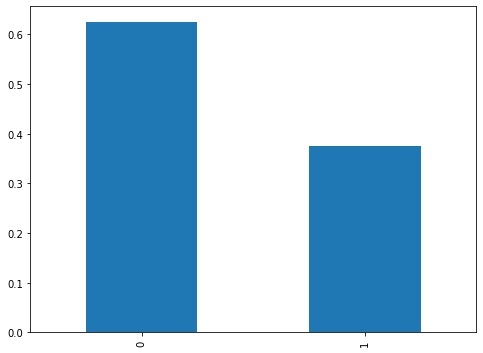

In [ ]:
df_nao_fez_prova_2dia["TEM_TRANSPORTE"].value_counts(normalize = True).plot.bar(figsize=(8,6))

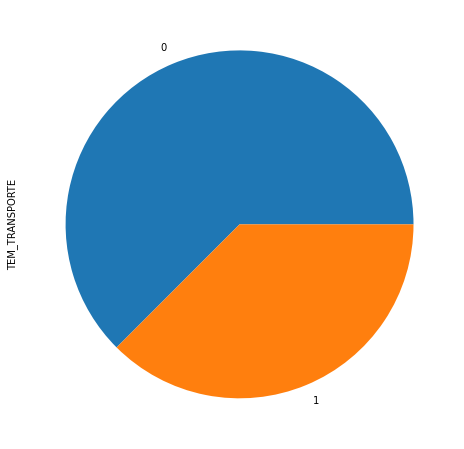

In [ ]:
df_nao_fez_prova_2dia["TEM_TRANSPORTE"].value_counts().plot.pie(figsize=(16,8))

In [ ]:
df["TEM_TRANSPORTE"].value_counts(normalize = True)

0    0.544053
1    0.455947
Name: TEM_TRANSPORTE, dtype: float64

In [ ]:
df_fez_prova_2dia["TEM_TRANSPORTE"].value_counts(normalize = True)

0    0.54028
1    0.45972
Name: TEM_TRANSPORTE, dtype: float64

In [ ]:
df_nao_fez_prova_2dia["TEM_TRANSPORTE"].value_counts(normalize = True)

0    0.625075
1    0.374925
Name: TEM_TRANSPORTE, dtype: float64

# Análise de Desempenho:
<ul>
   <li> Os alunos que fizeram todas as provas tem melhor notas no 1o dia daqueles que faltaram as provas do 2o. dia ? </li>
 <ul>

In [ ]:
df_fez_prova_2dia.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TEM_TRANSPORTE,NU_NOTA_TOTAL,NU_NOTA_TOTAL_1DIA,NU_NOTA_TOTAL_2DIA,TP_FEZ_PROVA_2DIA
count,71368.000000,71215.000000,71215.000000,71368.000000,71215.000000,71413.000000,71413.000000,71413.000000,71413.000000,71413.0
mean,489.546912,523.904211,533.426990,543.439459,614.814295,0.459720,2699.844745,1667.509298,1032.335447,1.0
std,82.692799,84.790969,64.203059,122.969716,194.246263,0.498378,470.370081,314.426042,191.819624,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,0.000000,0.000000,1.0
25%,423.500000,462.500000,496.100000,443.400000,520.000000,0.000000,2374.000000,1481.900000,882.600000,1.0
50%,483.200000,530.100000,539.400000,518.300000,620.000000,0.000000,2667.300000,1678.600000,993.500000,1.0
75%,549.800000,586.000000,578.700000,628.400000,740.000000,1.000000,3017.600000,1879.600000,1160.100000,1.0
max,841.800000,808.500000,784.900000,985.500000,1000.000000,1.000000,4154.100000,2481.800000,1827.300000,1.0


In [ ]:
df_nao_fez_prova_2dia.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TEM_TRANSPORTE,NU_NOTA_TOTAL,NU_NOTA_TOTAL_1DIA,NU_NOTA_TOTAL_2DIA,TP_FEZ_PROVA_2DIA
count,0.0,3326.000000,3326.000000,0.0,3326.000000,3326.000000,3326.000000,3326.000000,3326.0,3326.0
mean,NaN,469.801684,496.607667,NaN,450.661455,0.374925,1417.070806,1417.070806,0.0,0.0
std,NaN,96.513501,76.410711,NaN,240.153801,0.484176,334.049230,334.049230,0.0,0.0
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000,240.000000,240.000000,0.0,0.0
25%,NaN,411.450000,453.625000,NaN,340.000000,0.000000,1203.650000,1203.650000,0.0,0.0
50%,NaN,471.350000,506.350000,NaN,520.000000,0.000000,1459.900000,1459.900000,0.0,0.0
75%,NaN,533.875000,548.000000,NaN,600.000000,1.000000,1654.100000,1654.100000,0.0,0.0
max,NaN,711.400000,664.900000,NaN,980.000000,1.000000,2297.300000,2297.300000,0.0,0.0


In [ ]:
df_fez_prova_2dia['NU_NOTA_TOTAL_1DIA'].describe()

count    71413.000000
mean      1667.509298
std        314.426042
min          0.000000
25%       1481.900000
50%       1678.600000
75%       1879.600000
max       2481.800000
Name: NU_NOTA_TOTAL_1DIA, dtype: float64

In [ ]:
df_nao_fez_prova_2dia['NU_NOTA_TOTAL_1DIA'].describe()

count    3326.000000
mean     1417.070806
std       334.049230
min       240.000000
25%      1203.650000
50%      1459.900000
75%      1654.100000
max      2297.300000
Name: NU_NOTA_TOTAL_1DIA, dtype: float64

# Conclusão |  Resultados iniciais

<ul>
    <li>O fato da família ter ou não um meio de transporte influencia diretamente nas notas </li>
    <li> Os alunos que faltaram tem um desempenho abaixo da média daqueles que não faltaram </li>
 <ul>

# Modelo de Previsão de Faltas no 2o. Dia:
<ul>
    <li> Seleção de Colunas </li>  
<ul>

In [ ]:
cols = ["NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_REDACAO", "TEM_TRANSPORTE", "Q006"]
target = "TP_FEZ_PROVA_2DIA"
feat = ["NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_REDACAO", "TEM_TRANSPORTE", "Q006", "TP_FEZ_PROVA_2DIA"]

In [ ]:
df_model = df[feat].dropna()

In [ ]:
objFeatures = df_model.select_dtypes(include="object").columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for feat in objFeatures:
    df_model[feat] = le.fit_transform(df_model[feat].astype(str))

In [ ]:
df_model.head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_REDACAO,TEM_TRANSPORTE,Q006,TP_FEZ_PROVA_2DIA
0,467.0,453.2,620.0,0,2,1
4,555.7,625.6,680.0,0,2,1
5,577.7,611.5,660.0,0,1,1
7,521.6,552.7,580.0,1,2,1
9,435.7,473.2,460.0,1,2,1


In [ ]:
X = df_model[cols]
Y = df_model[target]

In [ ]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = seed )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
KNN_prediction = KNN_model.predict(X_test)


In [ ]:
print(accuracy_score(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.953450935676437
              precision    recall  f1-score   support

           0       0.03      0.26      0.05        68
           1       1.00      0.96      0.98     14841

    accuracy                           0.95     14909
   macro avg       0.51      0.61      0.51     14909
weighted avg       0.99      0.95      0.97     14909



# Conclusão |  Resultados iniciais para o Modelo
<ul>
    <li> De acordo com o resultado inicial, a acurácia apresenta um valor alto </li>
    <li> É importante testar outros modelos e outros datasets (outras cidades) para validar tal abordagem  </li>
 <ul>